In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot  import figure
import datetime

#  Walmart Challenge 

**Hypothesis explored :**
- there's an increase of sales around holiday weeks
- markdowns will stimulate sales (what is the effect of the combination of markdowns?)
- find the correlation of the different features on the target values 
- what is the consumer price index?


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Import data </h2>
</div>


###  Exploring the features datast 

In [2]:
path = r'C:\Users\Agnes\OneDrive\Documents\GitHub\Walmart challenge\walmart-recruiting-store-sales-forecasting'
features = os.path.join(path,'features.csv')
features_df = pd.read_csv(features)
features_df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [3]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


The features that would be used to make a prediction of the sales are :
   - Store Id:
   - Date (one date for every week of the year)
   - Temperature 
   - Fuel price 
   - Markdown 1 - 5
   - CPI (Consumer Price Index0
   - Unemployment

In [4]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

## Exploring  the train and test data sets 

In [5]:
train = os.path.join(path, 'train.csv')
train_df = pd.read_csv(train)

# record the number of training observations to segregate datasets after 
n = train_df['Date'].count()

# Open test 
test = os.path.join(path, 'test.csv')
test_df = pd.read_csv(test)
print(test_df.shape)
test_df.head(10)



(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [6]:
print(train_df.shape)
train_df.tail()


(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [7]:
test_df.head(10)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


## Exploring the store data sets 

In [8]:
## Inner join of the df dataset and the type of data 
store = os.path.join(path,'stores.csv')
store_df = pd.read_csv(store)
store_df.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


## Merging all the data sets: 

In [9]:
df2 = pd.concat([train_df,test_df])
print("The length of the new dataset is :" + str(df2.shape))
df2 = df2.reset_index().drop(columns =['index']) 
'''to be able to recover the training and test data sets after '''

# Adding stores data to the merged data set 
df = pd.merge(df2,store_df,how='left',on = 'Store')
'''to be able to recover the training and test data sets after, the join is now left rather than inner '''

## Collating the datasets adding features 
#df['key'] = df['Date'].astype(str) + df['Store'].astype(str)
#features_df['key'] = features_df['Date'].astype(str) + features_df['Store'].astype(str)
df1 = pd.merge(df,features_df, how = 'left',left_on = ['Date','Store'], right_on = ['Date','Store'] )
df1 = df1.drop(['IsHoliday_y'],axis = 1)

## Transform Date field into a date time object 
df['Date'] = pd.to_datetime(df['Date'])

# Rearranging the columns of our dataframes:
selector = ['Store','Dept','Type','Date','Size','Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment','IsHoliday_x','Weekly_Sales']
df1 = df1[selector]

The length of the new dataset is :(536634, 5)


In [10]:
df1.loc[n-5:n+5,:]

,Store,Dept,Type,Date,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Weekly_Sales
421565,45,98,B,2012-09-28,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,508.37
421566,45,98,B,2012-10-05,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,628.10
421567,45,98,B,2012-10-12,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,1061.02
421568,45,98,B,2012-10-19,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,760.01
421569,45,98,B,2012-10-26,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,1076.80
421570,1,1,A,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,NaN
421571,1,1,A,2012-11-09,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,NaN
421572,1,1,A,2012-11-16,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,NaN
421573,1,1,A,2012-11-23,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,NaN
421574,1,1,A,2012-11-30,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,NaN


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>2. EDA </h2>
</div>



In this section, i will do some explanatory analysis and analyse some of the 

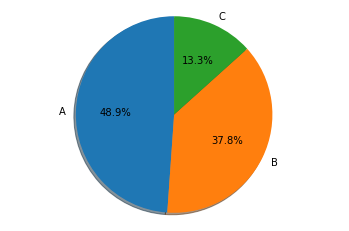

In [11]:
# Visualise the distribution of stores 
labels = [i for i in store_df['Type'].unique()]
size = store_df[['Type','Size']].groupby(['Type']).count()['Size']

fig1,ax1 = plt.subplots()
ax1.pie(size, labels = labels,autopct = '%2.1f%%', 
        shadow = True, startangle = 90)
ax1.axis('equal')
plt.show()

<AxesSubplot:title={'center':'Size'}, xlabel='[Type]'>

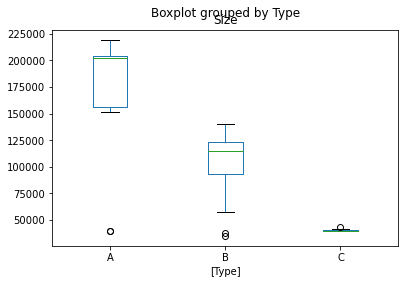

In [12]:
# What is the average size of each type of store 
store_df[['Type','Size']].boxplot(by ='Type', grid = False)

In [13]:
#sns.boxplot(x= 'Type', y = 'Size', data = store_df, palette = 'Set2')

We notice that we have more type A stores than any other type of stores. Also on average the size of store A is larger than either store B or C. 

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='[Type]'>

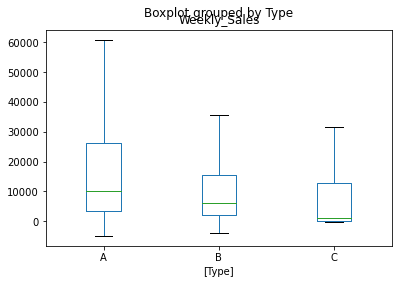

In [14]:
## Visualise the sales over the years per type of stores 
df1[['Type', 'Weekly_Sales']].loc[0:n,:].boxplot(by ='Type', grid = False,showfliers = False)

Not surprisingly the higher sales are observed in type A stores that are the largest and that are more

<Figure size 432x288 with 0 Axes>

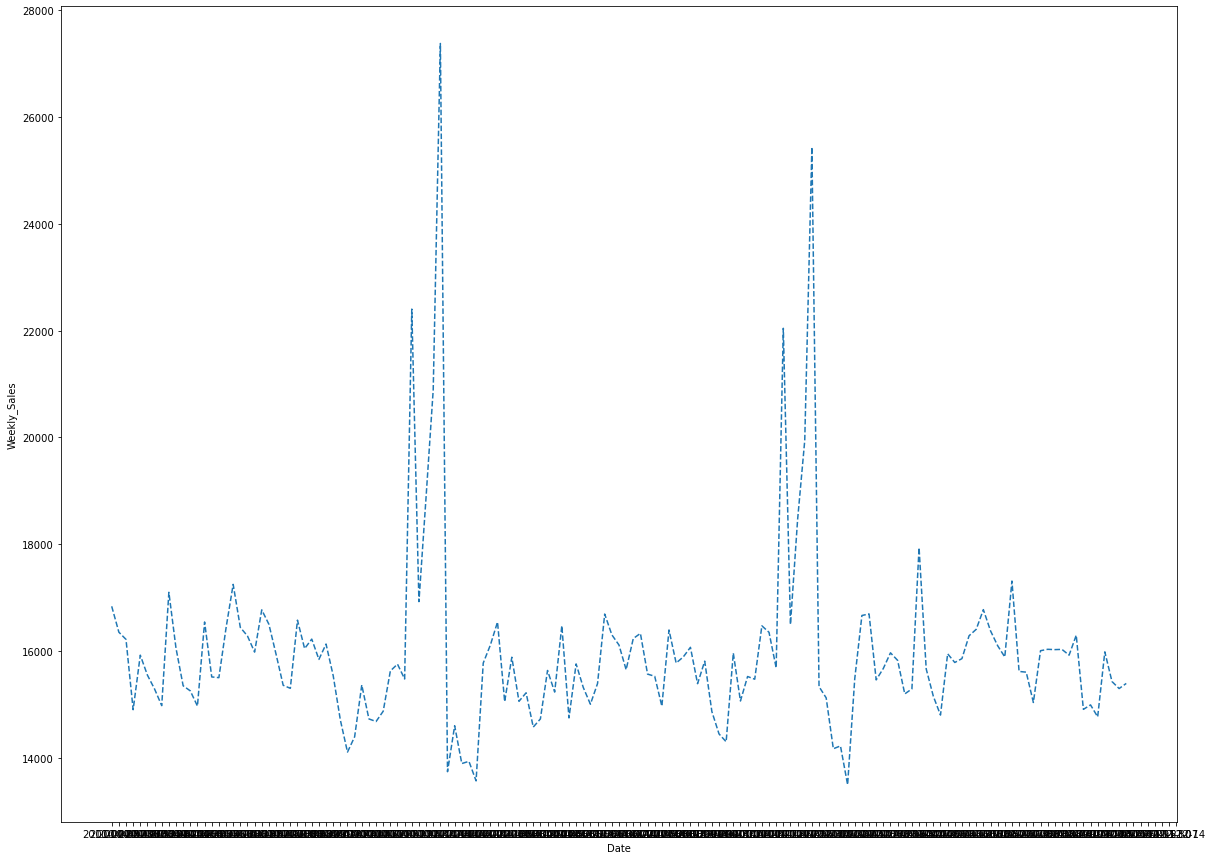

In [15]:
# Visualise the sales over the years 
fig = plt.gcf()
fig2,ax2 = plt.subplots()
x= [ i for i in df1['Date'].unique()]
y = df1[['Date', 'Store','Weekly_Sales']].groupby(['Date']).mean()['Weekly_Sales']
ax2.plot(x,y,'--')
ax2.set_xlabel("Date")
ax2.set_ylabel('Weekly_Sales')
fig2.set_size_inches(20,15,forward = True)

Over the year, the patterns of the sales seems to repeat. We have an increase in sales around Christmas and also around Thanksgiving. 
This suggests we can use *classical times series decomposition* to make our predictions (see Hymann)

Can we observe the same **trend** at each individual store?

In [16]:
df1

,Store,Dept,Type,Date,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Weekly_Sales
0,1,1,A,2010-02-05,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50
1,1,1,A,2010-02-12,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,46039.49
2,1,1,A,2010-02-19,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,41595.55
3,1,1,A,2010-02-26,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,19403.54
4,1,1,A,2010-03-05,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,98,B,2013-06-28,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN
536630,45,98,B,2013-07-05,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN
536631,45,98,B,2013-07-12,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN
536632,45,98,B,2013-07-19,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Data preparation</h2>
</div>


## Feature engineering 

In [17]:
## Add year, date columns 
df1['Year'] = pd.DatetimeIndex(df1['Date']).year
df1['Month'] = pd.DatetimeIndex(df1['Date']).month
df1.drop(columns = 'Date',inplace = True)

In [18]:
df1

,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Weekly_Sales,Year,Month
0,1,1,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50,2010,2
1,1,1,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,46039.49,2010,2
2,1,1,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,41595.55,2010,2
3,1,1,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,19403.54,2010,2
4,1,1,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,21827.90,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,98,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,2013,6
536630,45,98,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,2013,7
536631,45,98,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,2013,7
536632,45,98,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,2013,7


## Visualise the heatmap

<AxesSubplot:>

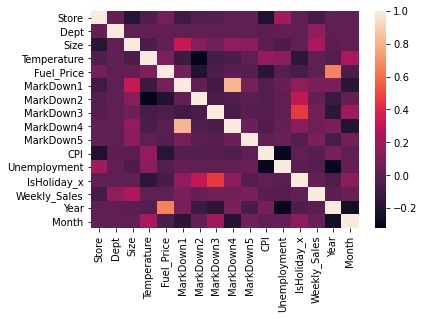

In [19]:
corr = df1.corr(method ='pearson')
corr
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns)


## Creating pipelines and OHE:

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)
## Helper function for OHE 

def ohe_func (df,col, name = 'Type ',ohe = ohe):
    index_names = df1[col].unique()
    for i in range(1,len(index_names)):
        col_name = name + str(index_names[i] )
        df1[col_name] = ohe.fit_transform(df1[[col]])[:,i]
    return df1

In [21]:

## OHE for the type of store                                          
df1 = ohe_func(df1,'Type',name = 'Type ')
### drop the type column from the data frame 
df1.drop(columns = 'Type',inplace = True)

## OHE for store number 
df1 = ohe_func(df1,'Store',name = 'Store ')
## drop the store id column from the data frame 
df1.drop(columns = 'Store',inplace = True)

## OHE for the holiday 
df1 = ohe_func(df1,'IsHoliday_x',name = 'IsHoliday ')
### drop the is holiday column from the data frame 
df1.drop(columns = 'IsHoliday_x', inplace = True)


In [22]:
# Convert NaN values present in the Markdown columns to 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline

pipeline_cat = Pipeline([('impute', SimpleImputer(missing_values =np.nan,
                            strategy ='constant',
                            fill_value = 0,
                            copy = True))])
pipeline_cont = Pipeline([('impute', SimpleImputer(missing_values = np.nan,strategy ='mean',copy = True))])
df1['MarkDown1'] = pipeline_cat.fit_transform(df1[['MarkDown1']])
df1['MarkDown2'] = pipeline_cat.fit_transform(df1[['MarkDown2']])
df1['MarkDown3'] = pipeline_cat.fit_transform(df1[['MarkDown3']])
df1['MarkDown4'] = pipeline_cat.fit_transform(df1[['MarkDown4']])
df1['MarkDown5'] = pipeline_cat.fit_transform(df1[['MarkDown5']])
df1['CPI'] = pipeline_cont.fit_transform(df1[['CPI']])
df1['Unemployment'] = pipeline_cont.fit_transform(df1[['Unemployment']])

In [23]:
# Verify that there are Holiday days 
df1['Unemployment'].isnull().sum()

## Sanity check 

0

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Data modeling </h2>
</div>


## Train/Test split 

In [24]:
## Separate the data into train and test data 
train_df = df1.loc[0:n-1,:]
test_df = df1.loc[n:, :]

X = train_df.drop(columns =['Weekly_Sales'])
Y = train_df['Weekly_Sales']
X.shape,Y.shape

## Split data in train and test data sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state =10)

## Linear Regression

In [25]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression(n_jobs = 2)
lin_reg.fit(X_train,Y_train)
print('Training data R^2 : %.04f' %(lin_reg.score(X_train,Y_train)))
print('Test data ^2: %0.04f' %(lin_reg.score(X_test,Y_test)))

Training data R^2 : 0.1172
Test data ^2: 0.1145


In [33]:
from sklearn.linear_model import Ridge 
lin_ridge = Ridge(alpha = 10000)
lin_ridge.fit(X_train, Y_train)
print('Training data R^2 : %.04f' %(lin_ridge.score(X_train,Y_train)))
print('Test data ^2: %0.04f' %(lin_ridge.score(X_test,Y_test)))

Training data R^2 : 0.1057
Test data ^2: 0.1043


## Decision Tree Regressor 

In [26]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
    #criterion = 'mae', splitter = 'best', min_samples_split =2, min_samples_leaf = 1)
dt_reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [27]:
print('Training data R^2 : %.04f' %(dt_reg.score(X_train,Y_train))
print('Test data ^2: %0.04f' %(dt_reg.score(X_test,Y_test)))

Training data R^2 : 1.0000
Test data ^2: 0.9366


The R^2 result for the training data is 1, this suggests the model might be overfitting the train data. I could rectify this by tweeking the parameters of my decision tree:
- set the min_samples_split = 2 
- 

I seem to have obtained some promissing results with the decision tree regressor. The next step will be to use extreme gradient boosting (will need to do additional research on this model)
Also, I need to find out how to 